In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.impute import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
import xgboost as xgb


#input datas
df_train = pd.read_csv("train.csv", index_col='id')
df_test = pd.read_csv("test.csv", index_col='id')

for col in ['Views', 'Likes', 'Stream', 'Comments', 'Duration_ms']:
    df_train[col] = np.log1p(df_train[col])
    df_test[col] = np.log1p(df_test[col])
    
    
df_train['Key'] = df_train['Key'].apply(lambda x: x if np.isnan(x) else int(x) )
df_test['Key'] = df_test['Key'].apply(lambda x: x if np.isnan(x) else int(x) )

for feature in ['Album_type', 'Licensed', 'official_video', 'Key']:
    df_train = pd.get_dummies(df_train, columns=[feature], prefix=feature)
    df_test = pd.get_dummies(df_test, columns=[feature], prefix=feature)

df_train = df_train.select_dtypes(exclude=['object'])
df_test = df_test.select_dtypes(exclude=['object'])

df_train.info()
df_test.info()
df_test.shape

#impute data

#with KNN
#imputer = KNNImputer(n_neighbors=5) 
#df_train = pd.DataFrame(imputer.fit_transform(df_train), columns = df_train.columns)
#df_test = pd.DataFrame(imputer.fit_transform(df_test), columns = df_test.columns)

#fill missing value in training set with mean
df_train = df_train.fillna(df_train.mean())
df_test = df_test.fillna(df_test.mean()) 

#df_train = df_train.fillna(df_train.median())

#fill missing value in testing set with mean
#df_test = df_test.fillna(df_test.median())

#convert training and testing set to numpy array
X_test = df_test.to_numpy()
X = df_train.drop(["Danceability"], axis=1).to_numpy()
Y = df_train['Danceability'].to_numpy()

#use polynomial features

poly = PolynomialFeatures(2)
X = poly.fit_transform(X)
X_test = poly.fit_transform(X_test)


#normalize the training and testing data
trainscaler = StandardScaler()
trainscaler.fit(X)
X = trainscaler.transform(X)
testscaler = StandardScaler()
testscaler.fit(X_test)
X_test = testscaler.transform(X_test)
print(X.shape)
df_test

/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'pandas.core.frame.DataFrame'>
Index: 17170 entries, 0 to 17169
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Danceability            17170 non-null  float64
 1   Energy                  14615 non-null  float64
 2   Loudness                14601 non-null  float64
 3   Speechiness             14655 non-null  float64
 4   Acousticness            14593 non-null  float64
 5   Instrumentalness        14569 non-null  float64
 6   Liveness                14635 non-null  float64
 7   Valence                 14596 non-null  float64
 8   Tempo                   14608 non-null  float64
 9   Duration_ms             14567 non-null  float64
 10  Views                   14574 non-null  float64
 11  Likes                   14591 non-null  float64
 12  Stream                  14602 non-null  float64
 13  Comments                14589 non-null  float64
 14  Album_type_album        17170 non-null  boo

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,...,Key_1.0,Key_2.0,Key_3.0,Key_4.0,Key_5.0,Key_6.0,Key_7.0,Key_8.0,Key_9.0,Key_10.0
id,,,,,,,,,,,,,,,,,,,,,
17170,0.350403,-6.679000,0.177000,5.842771e-07,0.002330,0.230346,0.488375,138.559000,12.313316,20.357341,...,False,False,False,False,False,True,False,False,False,False
17171,0.347429,-5.815000,0.030200,1.531935e-01,0.000687,0.000099,0.852000,92.761000,12.206942,18.092338,...,False,False,False,False,False,False,False,True,False,False
17172,0.786330,-3.930000,0.052200,7.676563e-05,0.114404,0.001561,0.551000,108.014000,12.279095,15.947907,...,True,False,False,False,False,False,False,False,False,False
17173,0.403583,-5.810000,0.026000,3.442951e-15,0.509000,0.000262,0.578000,120.423000,12.362512,16.833847,...,False,True,False,False,False,False,False,False,False,False
17174,0.334255,-8.627000,0.171000,1.619428e-05,0.000000,0.000340,0.525000,167.953000,12.739406,20.242777,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,-6.366894,0.045451,3.176921e-01,0.006016,0.001642,0.160253,72.136829,12.361892,16.081098,...,False,False,False,False,False,False,True,False,False,False
23481,0.318585,-4.148566,0.073000,7.419596e-03,0.000817,0.008843,0.614366,114.903993,11.840266,17.638231,...,False,False,False,False,False,False,False,False,False,True
23482,0.426223,-5.807545,0.072906,6.617082e-01,0.898308,0.000662,0.087281,87.969239,12.132658,16.833847,...,False,False,False,False,True,False,False,False,False,False


  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [04:55<00:00, 32.80s/it]

[1.706018632788867, 1.7030446425253871, 1.7112977839891699, 1.70130000157777, 1.702145097059032, 1.6826819549549543, 1.7057095171543069, 2.103893004771784, 2.4761793826441467]


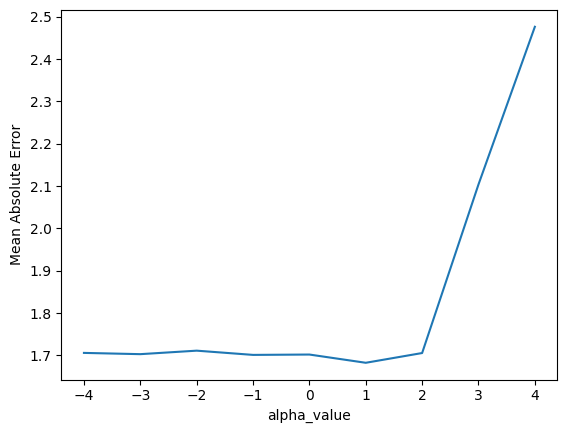

In [2]:
#use cross validation to test the optimal coefficient of the L1-regularization term(alpha) in xgboost 
#with absolute error as the loss function
kfold = KFold(n_splits=5, shuffle=True)
alpha_value = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
maes = []

for a in tqdm(alpha_value):
    perform = []
    for train_index, test_index in kfold.split(X):
        train_x, valid_x = X[train_index], X[test_index]
        train_y, valid_y = Y[train_index], Y[test_index]
        model = xgb.XGBRegressor(objective="reg:absoluteerror", alpha = 10**a, reg_lambda = 0,seed=123)
        #labmda is the L2-regularization term, we set it to zero
        model.fit(train_x, train_y)
        pred_y = model.predict(valid_x)
        perform.append(mean_absolute_error(valid_y, pred_y))
    maes.append(np.mean(perform))    
    
print(maes)

#plot the graph of alpha_values and maes
plt.plot(alpha_value, maes)
plt.xlabel('alpha_value')
plt.ylabel('Mean Absolute Error')
plt.show()

In [26]:
#use cross validation to test the optimal coefficient of the regularization term(alpha) in xgboost 
#with pseudo-huber loss 
kfold = KFold(n_splits=5, shuffle=True)
alpha_value = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
maes = []

for a in tqdm(alpha_value):
    perform = []
    for train_index, test_index in kfold.split(X):
        train_x, valid_x = X[train_index], X[test_index]
        train_y, valid_y = Y[train_index], Y[test_index]
        model = xgb.XGBRegressor(objective="reg:pseudohubererror", alpha = 10**a,reg_lambda = 0,seed=123)
        model.fit(train_x, train_y)
        pred_y = model.predict(valid_x)
        perform.append(mean_absolute_error(valid_y, pred_y))
    maes.append(np.mean(perform))    
    

print(maes)
#
#plot the graph of alpha_values and maes
plt.plot(alpha_value, maes)
plt.xlabel('alpha_value')
plt.ylabel('Mean Absolute Error')
plt.show()

  0%|          | 0/9 [00:04<?, ?it/s]


KeyboardInterrupt: 

100%|██████████| 9/9 [07:06<00:00, 47.38s/it]

[1.8766753747075335, 1.767136296387664, 1.719292546723717, 1.706913355960673, 1.697004661283873, 1.7099746502725428, 1.723764870642946, 1.8054739861362101, 1.9458992653370153]


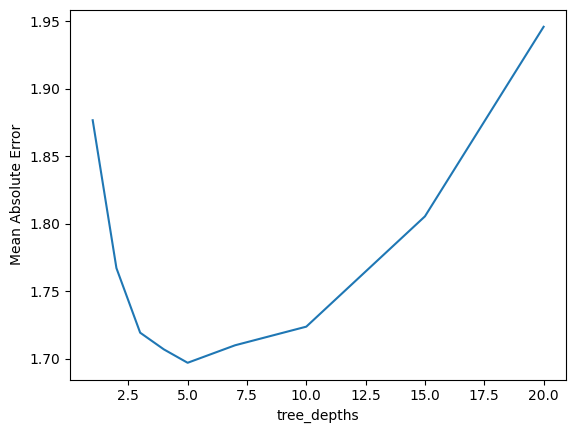

In [4]:
#use cross validation to test the optimal tree depth in xgboost with absolute error as the loss function
kfold = KFold(n_splits=5, shuffle=True)
tree_depths = [1,2,3,4,5,7,10,15,20]
maes = []

for h in tqdm(tree_depths):
    perform = []
    for train_index, test_index in kfold.split(X):
        train_x, valid_x = X[train_index], X[test_index]
        train_y, valid_y = Y[train_index], Y[test_index]
        model = xgb.XGBRegressor(objective="reg:absoluteerror", alpha = 1, max_depth = h,reg_lambda = 0,seed=123)
        model.fit(train_x, train_y)
        pred_y = model.predict(valid_x)
        perform.append(mean_absolute_error(valid_y, pred_y))
    maes.append(np.mean(perform))    
    

print(maes)
#[1.8776232081766735, 1.769646219505216, 1.7208844670817656, 1.7074859514163023, 1.7027271100726615, 1.7082303992902044, 1.7386322177845002, 1.8395040007977055, 2.030162320631444]
#the optimal tree depth is 5

#plot the graph of tree_depths and maes
plt.plot(tree_depths, maes)
plt.xlabel('tree_depths')
plt.ylabel('Mean Absolute Error')
plt.show()

100%|██████████| 9/9 [01:50<00:00, 12.31s/it]

[2.1132150486866683, 2.004721902186744, 1.9819564592650831, 1.9876500303827196, 1.9856478186735387, 1.9975593681382662, 2.041722501271953, 2.041820825402932, 2.0558383837576586]


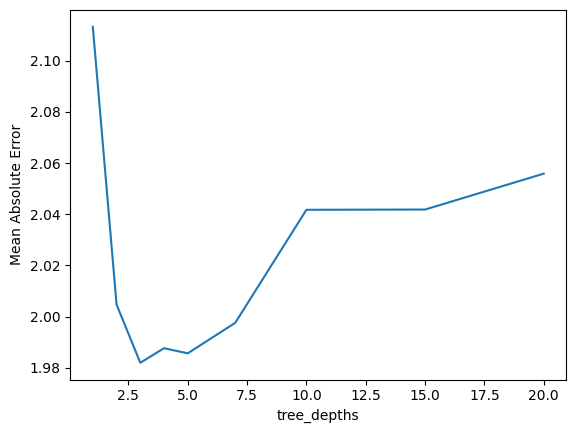

In [5]:
#use cross validation to test the optimal tree depth in xgboost with pseudo-huber loss as the loss function
kfold = KFold(n_splits=5, shuffle=True)
tree_depths = [1,2,3,4,5,7,10,15,20]
maes = []

for h in tqdm(tree_depths):
    perform = []
    for train_index, test_index in kfold.split(X):
        train_x, valid_x = X[train_index], X[test_index]
        train_y, valid_y = Y[train_index], Y[test_index]
        model = xgb.XGBRegressor(objective="reg:pseudohubererror", alpha = 1000, max_depth = h,reg_lambda = 0,seed=123)
        model.fit(train_x, train_y)
        pred_y = model.predict(valid_x)
        perform.append(mean_absolute_error(valid_y, pred_y))
    maes.append(np.mean(perform))    
    

print(maes)
#the optimal tree depth is 5

#plot the graph of tree_depths and maes
plt.plot(tree_depths, maes)
plt.xlabel('tree_depths')
plt.ylabel('Mean Absolute Error')
plt.show()

In [22]:
part_answer = pd.read_csv("test_partial_answer.csv", index_col='id')

#retrain the XGboost model with full data
model = xgb.XGBRegressor(objective="reg:absoluteerror", alpha = 1,max_depth = 5,reg_lambda = 0,seed=123)
model.fit(X, Y)
print(np.mean(np.abs(model.predict(X) - Y)))

df_test['Danceability'] = model.predict(X_test)
df_test['Danceability'].to_csv('submission.csv', index=True)
#print(df_test['Danceability'])
#print(part_answer)

pred_y_test = df_test["Danceability"][range(18871,23485)]
print(np.mean(np.abs(pred_y_test - part_answer["Danceability"])))
#8 2.55 2.56

#MAE
#1.4332014997904543
#2.6194916280745137
#public=2.2895
#PHE
#1.9597802909259263
#2.7944495468245445
#public=2.561




1.4332014997904543
2.6194916280745137


100%|██████████| 9/9 [2:09:27<00:00, 863.05s/it]   

[2.236924868957484, 2.1057658707047175, 2.034944670937682, 1.9354688410017473, 1.9039895165987186, 1.9004076878276064, 1.8959522422830521, 1.9036691904484566, 1.9183168316831682]


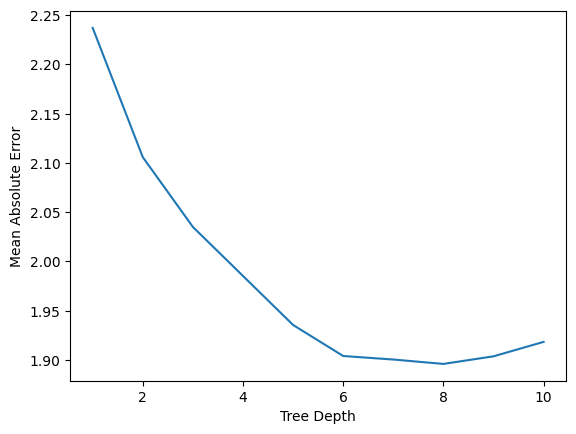

In [3]:
#use cross-validation to test the optimal tree_depth of the decision tree
kfold = KFold(n_splits=5, shuffle=True)
tree_depth = [1,2,3,5,6,7,8,9,10]
maes = []

for d in tqdm(tree_depth):
    perform = []
    for train_index, test_index in kfold.split(X):
        train_x, valid_x = X[train_index], X[test_index]
        train_y, valid_y = Y[train_index], Y[test_index]
        model = DecisionTreeRegressor(max_depth=d, criterion='absolute_error', random_state=123)
        model.fit(train_x, train_y)
        pred_y = model.predict(valid_x)
        perform.append(mean_absolute_error(valid_y, pred_y))
    maes.append(np.mean(perform))    
    

print(maes)
#[2.3200349446709376, 2.3150844496214327, 2.3071248301300717, 2.3063482818870122, 2.3026790914385558, 2.2291788002329644, 2.211852067559697, 2.2059794214715587, 2.1945253348864293, 2.1974956319161323, 2.111531741409435, 2.1046884100174723, 2.1061929722384, 2.100393127548049, 2.0960978450786256, 1.9522422830518347, 1.9285818287711125, 1.9474373907979032, 1.9511866627839254, 1.9626383226557949, 1.9196272568433315, 1.8867938264414676, 1.8980295088332362, 1.9062682003494467, 1.9005824111822947, 1.9111822947000583, 1.922029702970297, 1.9131236653077073, 1.911327897495632, 1.911677344205009]

#plot the graph of tree_depth and cv_scores
plt.plot(tree_depth, maes)
plt.xlabel('Tree Depth')
plt.ylabel('Mean Absolute Error')
plt.show()
#we can see that the optimal tree_depth is 5, so we use 5 as the tree_depth of the decision tree in the following part

100%|██████████| 8/8 [1:31:58<00:00, 689.81s/it]

[1.9233546884100174, 1.8669044845661038, 1.8172451951077462, 1.816421083284799, 1.8109007959619494, 1.8100446515239756, 1.8048888279831445, 1.8095821199767037]


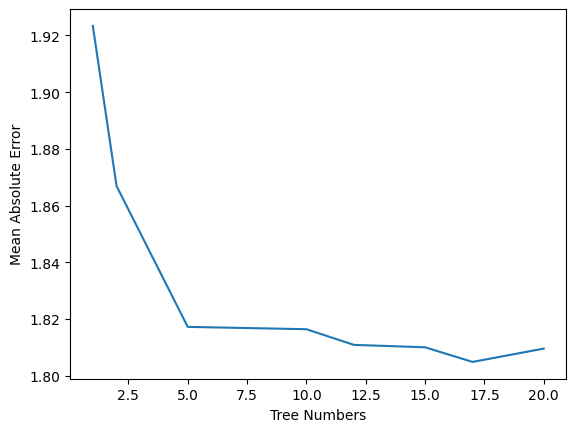

In [4]:
#use cross-validation to test the optimal number of trees of the random forest
kfold = KFold(n_splits=5, shuffle=True)
tree_num = [1,2,5,10,12,15,17,20]
maes = []

for n in tqdm(tree_num):
    perform = []
    for train_index, test_index in kfold.split(X):
        train_x, valid_x = X[train_index], X[test_index]
        train_y, valid_y = Y[train_index], Y[test_index]
        model = RandomForestRegressor(n_estimators=n,max_depth=7,criterion='absolute_error',n_jobs=-1,random_state=123)
        model.fit(train_x, train_y)
        pred_y = model.predict(valid_x)
        perform.append(mean_absolute_error(valid_y, pred_y))
    maes.append(np.mean(perform))    
    


print(maes)
#[2.3200349446709376, 2.3150844496214327, 2.3071248301300717, 2.3063482818870122, 2.3026790914385558, 2.2291788002329644, 2.211852067559697, 2.2059794214715587, 2.1945253348864293, 2.1974956319161323, 2.111531741409435, 2.1046884100174723, 2.1061929722384, 2.100393127548049, 2.0960978450786256, 1.9522422830518347, 1.9285818287711125, 1.9474373907979032, 1.9511866627839254, 1.9626383226557949, 1.9196272568433315, 1.8867938264414676, 1.8980295088332362, 1.9062682003494467, 1.9005824111822947, 1.9111822947000583, 1.922029702970297, 1.9131236653077073, 1.911327897495632, 1.911677344205009]

#plot the graph of tree_depth and cv_scores
plt.plot(tree_num, maes)
plt.xlabel('Tree Numbers')
plt.ylabel('Mean Absolute Error')
plt.show()
#we can see that the optimal tree_

# we can see when number of the decision tree is 15 ,the perform is good enough
# so we use 15 as the number of the decision tree in the random forest model in the following part

  0%|          | 0/5 [00:00<?, ?it/s]

In [5]:

#retrain the Random Forest model with full data
model = RandomForestRegressor(n_estimators=15, max_depth=7 ,criterion='absolute_error',n_jobs=-1,random_state=123)
model.fit(X, Y)
part_answer = pd.read_csv("test_partial_answer.csv", index_col='id')

print(np.mean(np.abs(model.predict(X) - Y)))

df_test['Danceability'] = model.predict(X_test)
df_test['Danceability'].to_csv('submission.csv', index=True)
#print(df_test['Danceability'])
#print(part_answer)

pred_y_test = df_test["Danceability"][range(18871,23485)]
print(np.mean(np.abs(pred_y_test - part_answer["Danceability"])))
#8 2.55 2.56


1.6933061541448262
2.5123085050184897


In [ ]:
#run linear regression on training set
model = LinearRegression()
mae_score = []
for i in tqdm(range(100)):
    train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size = 0.2)
    model.fit(train_x, train_y)

    #predict on validation set
    pred_y = model.predict(val_x) 
    mae = np.mean(np.abs(pred_y - val_y))
    mae_score.append(mae)
print(np.mean(mae_score))
#1.864922953017888



In [40]:
#run Lasso regression on training set
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
result = []
for a in alphas:
    model = Lasso(alpha=a,random_state=123)
    mae_score = []
    for i in tqdm(range(20)):
        train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size = 0.2)
        model.fit(train_x, train_y)

        #predict on validation set
        pred_y = model.predict(val_x) 
        mae = np.mean(np.abs(pred_y - val_y))
        mae_score.append(mae)
    result.append(np.mean(mae_score))
print(result)
#[1.859802672727658, 1.8705790319054671, 2.026651088701079, 2.4506405558403506, 2.487390611341788, 2.4981356969718345, 2.488871803904156]
#min = 1.859802672727658
#0.001 has the best performance


  0%|          | 0/20 [00:00<?, ?it/s]

In [8]:
#retrain the Lasso model with full data
model = Lasso(alpha=0.01,random_state=123)
model.fit(X, Y)
part_answer = pd.read_csv("test_partial_answer.csv", index_col='id')

print(np.mean(np.abs(model.predict(X) - Y)))

df_test['Danceability'] = model.predict(X_test)
df_test['Danceability'].to_csv('submission.csv', index=True)
#print(df_test['Danceability'])
#print(part_answer)

pred_y_test = df_test["Danceability"][range(18871,23485)]
print(np.mean(np.abs(pred_y_test - part_answer["Danceability"])))
#8 2.55 2.56

1.8440895291318975
2.3580867874397318


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.028e+03, tolerance: 1.403e+01
  model = cd_fast.enet_coordinate_descent(
